In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

In [2]:
fifa_data = pd.read_csv('FIFA 2018 Statistics.csv')

In [3]:
# target
y = (fifa_data['Man of the Match']=='Yes')

#Features
feature_names = [i for i in fifa_data.columns
                if fifa_data[i].dtype in [np.int64]]
X = fifa_data[feature_names]
X.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0


In [4]:
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [5]:
# model
model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

In [6]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1,-1)

model.predict_proba(data_for_prediction_array)

C:\Users\ashok\DemoVirtualEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.29, 0.71]])

In [11]:
#object for creating shap values
explainer = shap.TreeExplainer(model)
# calculate shap values
shap_values = explainer.shap_values(data_for_prediction)

In [13]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1], data_for_prediction)

In [14]:
# Kernel SHAP explainer
k_explainer = shap.KernelExplainer(model.predict_proba, X_train)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.

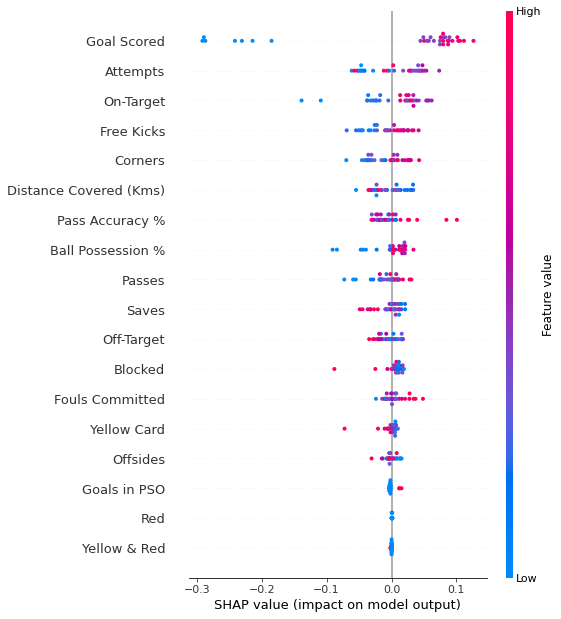

In [17]:
# for the test data summary plots
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

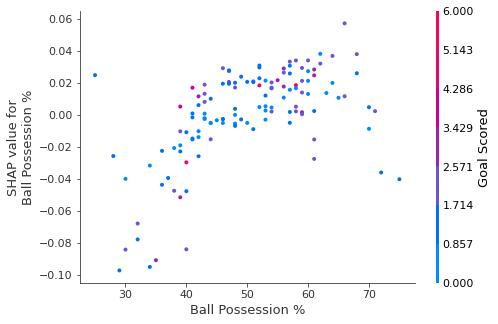

In [18]:
# we can use shap for whole features
explainer = shap.TreeExplainer(model)

# calculating shap
shap_values = explainer.shap_values(X)

# make plot
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index='Goal Scored')